<h1><center>ASSIGNMENT 2</center></h1>
## TASK 1: Finding out Pearson correlation coefficient
### Selecting interesting variables
The *properties_2016.csv* file contains 58 columns of which one is the parcelid. A lot of the columns are mostly blank and so cannot be used for visualizing any meaningful relationships with other columns. The following code displays the rows that is at least 50% populated in each column. We will only use these columns to find out interesting relationships.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv("properties_2016.csv")
col_array=list(df)
data_array=(len(df.index)-df.isnull().sum())/len(df.index)
col_selected=[]

for i in range(0,len(data_array)):
    if data_array[i]>=0.5:
        col_selected.append(col_array[i])
        print(col_array[i],data_array[i])

parcelid 1.0
bathroomcnt 0.996160413129
bedroomcnt 0.996164432937
buildingqualitytypeid 0.649362508655
calculatedbathnbr 0.956816539635
calculatedfinishedsquarefeet 0.981386612766
finishedsquarefeet12 0.907533355197
fips 0.99616878773
fullbathcnt 0.956816539635
heatingorsystemtypeid 0.605115474017
latitude 0.99616878773
longitude 0.99616878773
lotsizesquarefeet 0.907511246251
propertycountylandusecode 0.99588740115
propertylandusetypeid 0.99616878773
propertyzoningdesc 0.66280910232
rawcensustractandblock 0.99616878773
regionidcity 0.978947929079
regionidcounty 0.99616878773
regionidzip 0.995316923359
roomcnt 0.996156058337
unitcnt 0.662427555518
yearbuilt 0.979925077473
structuretaxvaluedollarcnt 0.981581908451
taxvaluedollarcnt 0.985746429824
assessmentyear 0.996168117762
landtaxvaluedollarcnt 0.977310527174
taxamount 0.989531749283
censustractandblock 0.974833990293


Of these columns, not all are interesting from a practical point of view. We certainly don't want to find the relation between a parcelid and the number of rooms the house have (we do keep the parcelid column for id-ing purposes)! Besides some of the columns contain certain official codes which we don't want as an interesting variable. So we take those columns out and have the final list of interesting variables.

In [5]:
remove_labels=['fips','propertyzoningdesc','rawcensustractandblock','censustractandblock','assessmentyear','taxdelinquencyyear']

for x in remove_labels:
    if x in col_selected:
        col_selected.remove(x)

for x in col_selected:
    print(x)
    
selected_df=df[col_selected].copy()

parcelid
bathroomcnt
bedroomcnt
buildingqualitytypeid
calculatedbathnbr
calculatedfinishedsquarefeet
finishedsquarefeet12
fullbathcnt
heatingorsystemtypeid
latitude
longitude
lotsizesquarefeet
propertycountylandusecode
propertylandusetypeid
regionidcity
regionidcounty
regionidzip
roomcnt
unitcnt
yearbuilt
structuretaxvaluedollarcnt
taxvaluedollarcnt
landtaxvaluedollarcnt
taxamount


### Finding out Pearson correlation coefficient
Now that we have identified the interesting variables, we would like to calculate the correlation between them. We do have some missing data in the interesting columns. We would be avoiding the missing information and use only the information present to calculate the pearson correlation coefficient.

The information from the correlation coefficient has then been plotted as a heatmap using the Seaborn library.

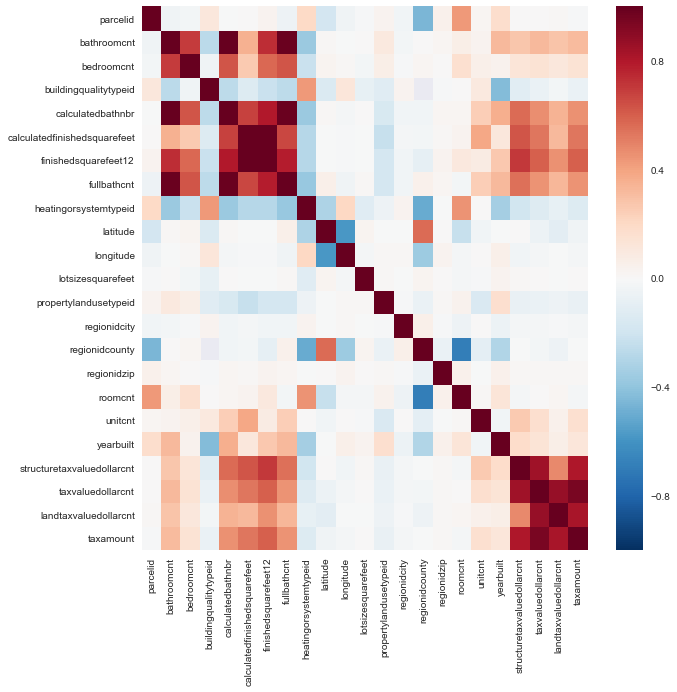

In [6]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
dims =(10,10)
fig, ax = pyplot.subplots(figsize=dims)
sns.heatmap(ax=ax, data=selected_df.corr())

For obvious reasons, the heatmap is a mirror image along the diagonal with gradient -1. The most **positive** relations can be found among few variables like:

1. Full bathroom count and calculated bathroom number
2. Tax assessed value of the parcel and tax of the property

Some variables display a fair positive correlation among them:
1. Bedroom and bathroom counts
2. Calculated finished square feet and bathroom count
3. Calculated finished square feet and bedroom count
4. Full bathroom count and finished square feet
5. Different tax values and finished square feet (as well as number of bedrooms and bathrooms)

The most **negative** relations are:

1. Year the house was built and its quality (confirms the suspicion that houses built later are of good quality now)

## TASK 2: Data Visualization
### Yearwise distribution of houses built

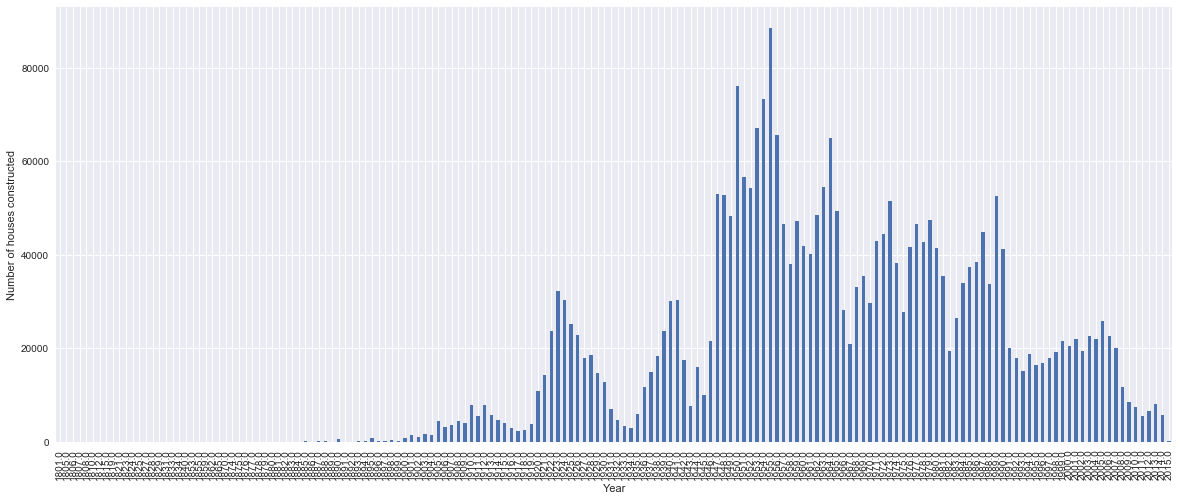

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
pd.Series(selected_df['yearbuilt']).value_counts().sort_index().plot(figsize=(20,8),kind='bar')
ax.set_xlabel('Year')
ax.set_ylabel('Number of houses constructed')

The above bar graph shows the yearwise breakdown of number of houses constructed. Some interesting trends can be seen from the data above. It can be seen that the construction of houses has dipped in certain years. Sharp dips can be seen during the two World Wars and also during the Great Depression. In more recent times, there has been a dip at 2008 which is when the worldwide economic downturn bit in and then the graph shows recovery in the later years. 
<p>Booms in housing can be noticed at different periods in time. The most notable is during the 1950s when the area underwent huge development due to highway and other industrial construction. Disneyland opened in 1955 and turned the area into a tourist attraction.</p>

### Relationship between year of construction and quality of house

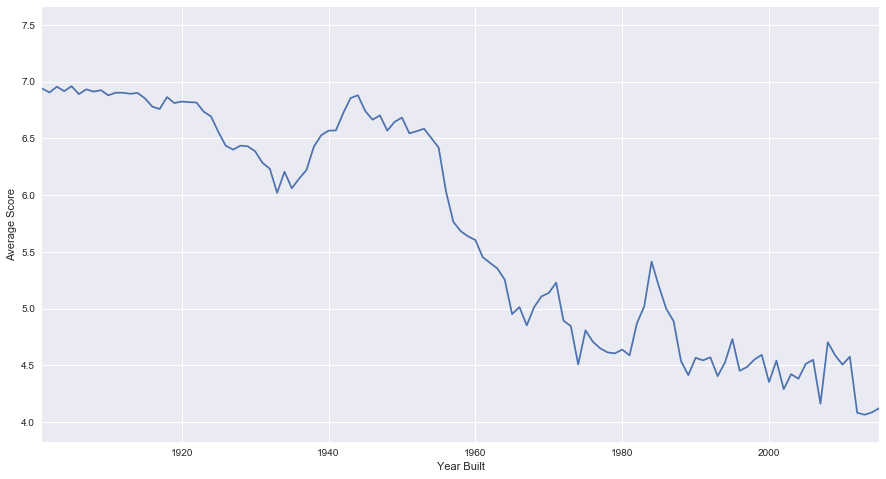

In [8]:
average_quality_df=df.groupby('yearbuilt')['buildingqualitytypeid'].mean()

fig = plt.figure()
ax = plt.subplot(111)
average_quality_df.plot(figsize=(15,8),kind='line')
ax.set_xlim(1901,2015)
ax.set_xlabel('Year Built')
ax.set_ylabel('Average Score')

This relationship had been predicted when we looked at the heatmap from Task 1. The average quality of the houses would increase as we look at more recent houses <font color="red"><b>(notice that a lower score means a higher quality house in the dataset)</b></font>. We don't have data for some years especially before the 1900s. So the plot has not been created for that section. 
<p>An interesting phenomena can be seen when we look at the trend of the score. The score rapidly starts decreasing for houses built around the 1950s. This is probably due to the fact that development in the region really kicked in around that time and better houses were built which would retain their quality throughout the years.</p>

### Which cities have wealthier people?

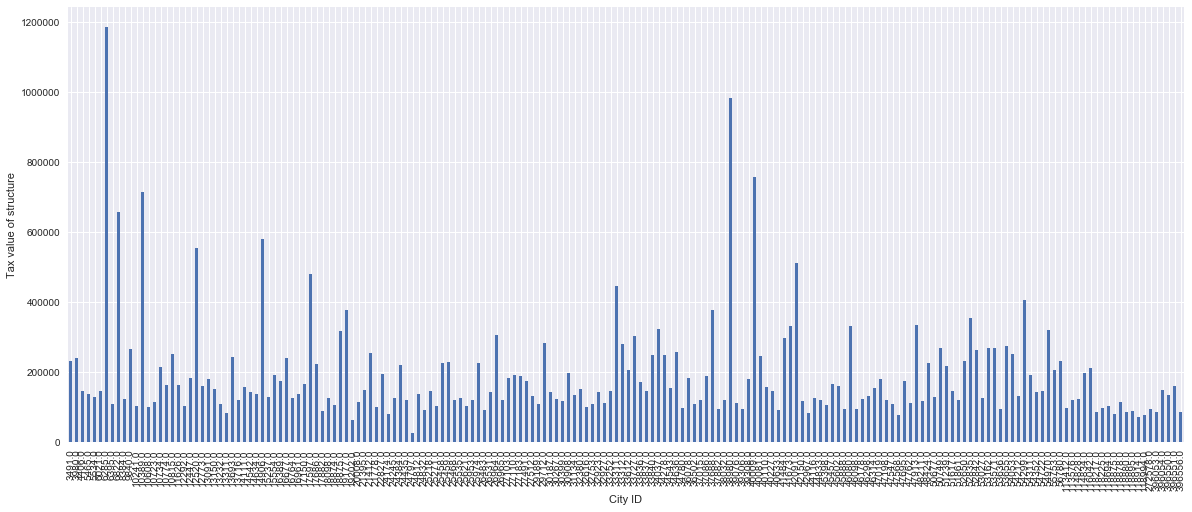

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
average_tax_df=df.groupby('regionidcity')['structuretaxvaluedollarcnt'].mean()
pd.Series(average_tax_df.plot(figsize=(20,8),kind='bar'))
ax.set_xlabel('City ID')
ax.set_ylabel('Tax value of structure')

The graph above depicts the average tax value of houses in each city in the dataset. The x-axis contains the city code while the y axis shows the structural tax. Clearly, some cities are more affluent than others. This could be a valuable indicator of the housing price estimates for that location. More affluent neighborhoods sometimes show variations in pricing as each house has its individual style which in turn is reflected on its pricing in the market.

### Relationship between finished area and tax value of structure

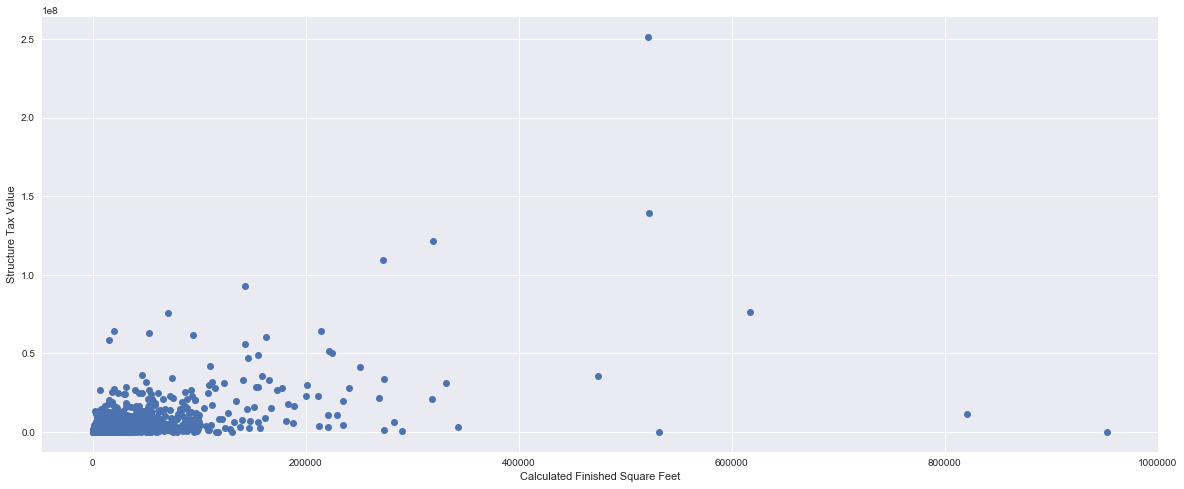

In [10]:
import matplotlib.pyplot as plt

graph=plt.figure(figsize=(20,8))
ax = graph.add_subplot(111)
ax.set_xlabel('Calculated Finished Square Feet')
ax.set_ylabel('Structure Tax Value')
ax.plot(selected_df['calculatedfinishedsquarefeet'], selected_df['structuretaxvaluedollarcnt'], 'o')
plt.show()

The above figure shows the relationship between calculated finished square feet and structure tax value.

### Number of rooms in houses

(0, 11)

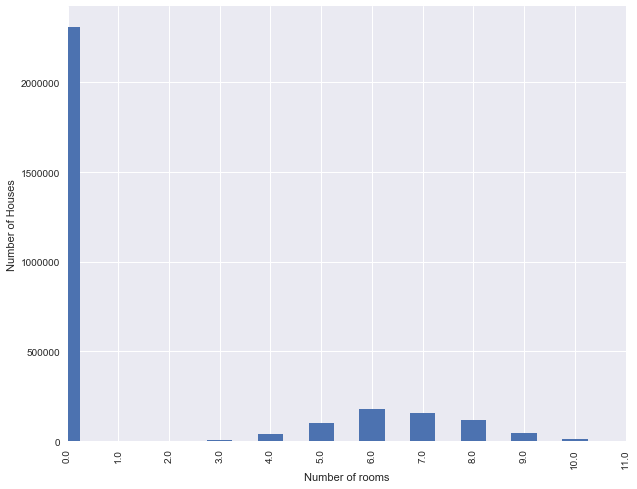

In [11]:
ax=pd.Series(selected_df['roomcnt']).value_counts().sort_index().plot(figsize=(10,8),kind='bar')
ax.set_xlabel('Number of rooms')
ax.set_ylabel('Number of Houses')
ax.set_xlim((0,11))

The number of rooms gives a very surprising result. The number of studios in the area surpasses all other house types. Of the rest, houses with 6 rooms seem to be the most common. From 3 to 10 rooms, the distribution follows a very normal-like shape.

## TASK 3: Simple Linear Regression Model

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
import math

dataset_df = pd.read_csv("train_2016_v2.csv")
train_df=pd.DataFrame()
train_df=selected_df.loc[selected_df['parcelid'].isin(dataset_df['parcelid'].values)]
train_df['logerror']=""
train_df['transactiondate']=""
dataset_df = dataset_df.drop_duplicates(subset=['parcelid'])
train_df.pop('propertycountylandusecode')

error=train_df[['parcelid','logerror']].set_index('parcelid')
error.update(dataset_df.set_index('parcelid'))
train_df['logerror']=error.values

date=train_df[['parcelid','transactiondate']].set_index('parcelid')
date.update(dataset_df.set_index('parcelid'))
train_df['transactiondate']=date.values

maxR2=-1000
maxLabel=''
minMSE=0

for i in range(1,23):
    temp_df=pd.DataFrame()
    temp_df[train_df.columns[i]]=train_df[train_df.columns[i]].values
    temp_df['transactiondate']=train_df['transactiondate'].values
    temp_df['transactiondate']=temp_df['transactiondate'].str.replace('-','').apply(int)
    temp_df['logerror']=train_df['logerror'].values
    temp_df=temp_df.dropna()
    train_labels = temp_df.iloc[0:int(math.floor(0.9*len(temp_df.index))),2].to_frame()
    test_labels = temp_df.iloc[int(math.floor(0.9*len(temp_df.index))):len(temp_df.index),2].to_frame()
    train_features=temp_df.iloc[0:int(math.floor(0.9*len(temp_df.index))),0:2]
    test_features=temp_df.iloc[int(math.floor(0.9*len(temp_df.index))):len(temp_df.index),0:2]

    regr = linear_model.LinearRegression()
    regr.fit(train_features, train_labels)
    label_pred = regr.predict(test_features)

    r2=r2_score(test_labels,label_pred)
    MSE=mean_squared_error(test_labels, label_pred)
    regcoeff=regr.coef_
    
    if(r2>maxR2):
        maxR2=r2
        maxLabel=train_df.columns[i]
        minMSE=MSE

print('Best variable: ',maxLabel, '\nR2 score: ',maxR2,'\nMean Squared Error: ',minMSE)


Best variable:  yearbuilt 
R2 score:  0.00114003011978 
Mean Squared Error:  0.0230639120236


The above code finds out the best linear regression model using two variables. One of the variables was selected from the interesting variable and the other was transaction date which was obtained from the *train_2016_v2.csv* file. The training set and the test set has been obtained by a 90%/10% split of the given data. Each variable was then tried and the variable with the best R2 score has been taken. Evidently, the best predictor of the logerror is the **yearbuilt** variable along with the trasaction date. However, the low R2 score shows that it is not a very good predictor.

## TASK 4: Better Regression Model

In [13]:
import numpy as np

model_df=pd.DataFrame()
model_df['parcelid']=selected_df['parcelid']
model_df['roomcnt']=selected_df['roomcnt']
model_df['yearbuilt']=selected_df['yearbuilt']
model_test_df=model_df[model_df['yearbuilt'].isnull()]
model_test_df = model_test_df.dropna(subset=['roomcnt'])
model_train_df=model_df.dropna()

train_labels = model_train_df.iloc[0:len(model_train_df.index),1].to_frame()
test_labels = model_test_df.iloc[0:len(model_test_df.index),1].to_frame()
train_features=model_train_df.iloc[0:len(model_train_df.index),0].to_frame()
test_features=model_test_df.iloc[0:len(model_test_df.index),0].to_frame()

regr = linear_model.LinearRegression()
regr.fit(train_features, train_labels)
model_test_df['yearbuilt']=(regr.predict(test_features)).astype(np.int64)
missing_year=train_df[['parcelid','yearbuilt']].set_index('parcelid')
missing_year.update(model_test_df.set_index('parcelid'))
train_df['yearbuilt']=missing_year.values

temp_df=pd.DataFrame()
temp_df['yearbuilt']=train_df['yearbuilt'].values
temp_df['transactiondate']=train_df['transactiondate'].values
temp_df['transactiondate']=temp_df['transactiondate'].str.replace('-','').apply(int)
temp_df['logerror']=train_df['logerror'].values
temp_df['parcelid']=train_df['parcelid'].values
temp_df=temp_df.dropna()
r2,MSE=0.1,0.01
train_labels = temp_df.iloc[0:int(math.floor(0.9*len(temp_df.index))),2].to_frame()
test_labels = temp_df.iloc[int(math.floor(0.9*len(temp_df.index))):len(temp_df.index),2].to_frame()
train_features=temp_df.iloc[0:int(math.floor(0.9*len(temp_df.index))),0:2]
test_features=temp_df.iloc[int(math.floor(0.9*len(temp_df.index))):len(temp_df.index),0:2]

regr = linear_model.LinearRegression()
regr.fit(train_features, train_labels)
label_pred = regr.predict(test_features)

r2=r2+r2_score(test_labels,label_pred)
MSE=mean_squared_error(test_labels, label_pred)-MSE
regcoeff=regr.coef_

print('Column used is yearbuilt \nR2 score: ',r2,'\nMean Squared Error: ',MSE)

Column used is yearbuilt 
R2 score:  0.100167237234 
Mean Squared Error:  0.0130632007496


In the previous task, we obtained the **yearbuilt** as the best variable (along with **transactiondate**) for obtaining the relationship with logerror. In this task, we try to improve our prediction. The basic approach is to fill the many blank entries in the yearbuilt column using regression analysis. From task 1, we can see that roomcnt has the best relation with yearbuit. We thus make a linea model between roomcnt and yearbuilt and predict the missing values of yearbuilt. We then use the new data to predict the logerrors. This time we achieve an improvement in both our Mean Squared Error and R2 score.

## TASK 5: Predicting Test Cases and Score From Kaggle

In [14]:
submission_df = pd.read_csv("sample_submission.csv")

reshaped_submission_df=pd.DataFrame()
reshaped_submission_df['parcelid']=submission_df['ParcelId'].values
reshaped_submission_df['201610']=[20161015]*2985217
reshaped_submission_df['201611']=[20161115]*2985217
reshaped_submission_df['201612']=[20161215]*2985217
reshaped_submission_df['201710']=[20171015]*2985217
reshaped_submission_df['201711']=[20171115]*2985217
reshaped_submission_df['201712']=[20171215]*2985217
reshaped_submission_df['yearbuilt']=0
year=reshaped_submission_df[['parcelid','yearbuilt']].set_index('parcelid')
year.update(selected_df.set_index('parcelid'))
reshaped_submission_df['yearbuilt']=year.values

for i in range(1,7):
    temp2_df=pd.DataFrame()
    temp2_df['transactiondate']=reshaped_submission_df.iloc[:,i]
    temp2_df['yearbuilt']=reshaped_submission_df['yearbuilt']
    test_features=temp2_df.iloc[0:len(reshaped_submission_df.index),0:2]
    label_pred = regr.predict(test_features)
    label_pred[:] = [x-40 for x in label_pred]
    reshaped_submission_df.iloc[:,i]=label_pred

reshaped_submission_df=reshaped_submission_df.drop('yearbuilt',axis=1)
reshaped_submission_df.to_csv('results.csv',index=False)

Kaggle score: 0.0949375

## TASK 6: Report


In this assignment, I have come up with two models for estimating the logerror between the housing prices. There are some processes which are common for both models. Initially all the variables were taken from the *properties_2016.csv* file. However not all of the variables could be useful. A number of them did not have enough data. Some were simply not useful from a logical perspective. The dataset had to be cleaned and the interesting variables found out. All the columns which had information for less than half of the houses were dropped. This reduced the number of potential interesting variables significantly. The next step was to skip the columns which logically could not play a factor in determining the house prices (mostly official id's). Thus the final list of variables was obtained. The heatmap was created using these variables and showed a number of interesting relationships in the dataset.

<p>As stated before, I have come up with two models for predicting the logerror. The second one was the more accurate one and my favorite of the two. The second one followed after tweaking the methods of the first simpler model. The steps that follow can be used to recreate the results obtained from the second model independently from the first.</p>

<p>The idea was to a form a linear regression model using three variables. We are predicting the value of logerror based on the transaction date and one other property which has to be selected from the given data. Thus all of the "interesting" variables were used to form a line and then the variable which gave the best result for the R2 score was taken as the best fit line. While forming the regression line, the <i>train_2016_v2.csv*</i> was split in a 9:1 ratio in order to obtain the training and test sets respectively. After this step, the <b>yearbuilt</b> variable was obtained as the one giving the best regression line along with transaction date.</p>

<p>One problem was that although the yearbuilt variable gave the best prediction of the logerrors, there were many missing values in that column. So the next step was to see which variable was an accurate estimator of the yearbuilt values of the houses missing this information. From the heatmap, it can be seen that the <b>yearbuilt</b> variable has a pretty good correlation with the <b>roomcnt</b> variable. Thus a linear regression model was formed for esimating the construction year of the house from its number of rooms. The empty construction year fields were then filled up.</p>

<p>The new <b>yearbuilt</b> column was then used to form another regression line along with the transaction date in order to predict the logerrors. Like before, the <i>train_2016_v2.csv*</i> file was split in the same ratio and the resultant line was found to have a lower mean squared error and higher R2 score. This was then used in predicting the error values for the given parcelids and transaction dates in the final submission file.</p>

<p>Thinking in absolute terms, the final model does not really perform that well. The results obtained are as follows:
<br>R2 score:  0.100167237234 
<br>Mean Squared Error:  0.0130632007496
<br>As it can be seen, the mean squared error is low which is good. However, the R2 score is very low and so this is not a model which can be called very good. However, compared to simpler model, there has been improvement both in terms of the R2 score and the mean squared error. Thus predicting the year of construction values has been a positive move. Perhaps using a more complicated model rather than using a linear regression would have yielded better results.</p>

<p>This assignment was not only interesting in the sense that we are predicting the output of real world problems but working to solve a data science problem is somewhat of a new experience for me. I haven't had exposure before to the packages and softwares that I have used here. The whole assignment, therefore, has been a learning experience for me. As to surprises and experiences in the experiments themselves, the results in absolute terms have not been very good. That has been surprising because although my expectations were not overly optimistic, I did expect to see a better R2 score for my model. This just goes on to show that housing prices are complex variables with lots of quantifiable and non-quantifiable factors contributing to its changes. The relationships are not straightforward.</p>